<a href="https://colab.research.google.com/github/SamwelJane/Kira-Plastinina-Brand/blob/master/Customer's_behaviours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Kira Plastinina Customer Group characteristics

Author: Samwel Jane

Date: November 1, 2019



# 1. Introduction

Kira Plastinina is a Russian  brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s groups characteristics from data that they have collected over the past year.

# 2. Business undestanding

#Business Problem 

Understanding customes behaviours remains to be  a difficult thing in the markert especially in branding compaines which faces  customers churn.Thus understanding the charecteristics of these customer based on thier groups can be a good achievement to Kira plastinina.
 convert the problem to data problem
 
# 3.Experimental Research Design
      
  * Problem Definition
  * Set up your work environment
  * Data Sourcing
  * Check the Data
  * Perform Data Cleaning
  * Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
  * Implement the Solution
  * Challenge the Solution
  * Follow up Questions

# 4. Metrics of Success

### Data Understanding

This part will involve assessing the quality and transforming variables into their correct formats.


In [0]:

# Installing and importing the necessary libraries
#library(tidyverse)
#library(magrittr)
#lbrary(grid)
#theme_set(theme_bw())
#options(warn = -1)
#library(devtools)
#install_github("vqv/ggbiplot", force = TRUE)
#library(ggbiplot)
#install_github("espanta/lubripack", force = TRUE)
#library(lubripack)
#lubripack(c('gridExtra', 'ggcorrplot', 'ggExtra', 'caret', 'DataExplorer', 'Hmisc', 'pastecs', 'psych', 'corrplot', 'factoextra', 'Rtsne'))

In [0]:
# Import the datasets
# string as factor meansi want the dataframe as categorical
brand <- read.csv("online.csv",stringsAsFactors = T )

# Printing the first six rows of the dataset 
head(brand)


Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
6 0          Feb   2                2       1      3          
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE  
6 Returning_Visitor FALSE   FALSE

In [0]:
# checking variables in the dataset
names(brand) <- gsub(" |\\)|\\(|-|=", "", names(brand))
names(brand)


[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [0]:
# shape of the dataframe
dim(brand)
# the dataset has 18 columns and 123330 rows

[1] 12330    18

In [0]:
#Checking missing values,
# checking them help to see if the input data given for analysis has got missing  values before diving deep into the analysis


#options(repr.plot.width=8, repr.plot.height=6)

missing <- is.na(brand)

head(missing)

Administrative Administrative_Duration Informational
[1,] FALSE          FALSE                   FALSE        
[2,] FALSE          FALSE                   FALSE        
[3,] FALSE          FALSE                   FALSE        
[4,] FALSE          FALSE                   FALSE        
[5,] FALSE          FALSE                   FALSE        
[6,] FALSE          FALSE                   FALSE        
     Informational_Duration ProductRelated ProductRelated_Duration BounceRates
[1,] FALSE                  FALSE          FALSE                   FALSE      
[2,] FALSE                  FALSE          FALSE                   FALSE      
[3,] FALSE                  FALSE          FALSE                   FALSE      
[4,] FALSE                  FALSE          FALSE                   FALSE      
[5,] FALSE                  FALSE          FALSE                   FALSE      
[6,] FALSE                  FALSE          FALSE                   FALSE      
     ExitRates PageValues SpecialDay Month OperatingSystems Browser Region
[1,] FALSE     FALSE      FALSE      FALSE FALSE            FALSE   FALSE 
[2,] FALSE     FALSE      FALSE      FALSE FALSE            FALSE   FALSE 
[3,] FALSE     FALSE      FALSE      FALSE FALSE            FALSE   FALSE 
[4,] FALSE     FALSE      FALSE      FALSE FALSE            FALSE   FALSE 
[5,] FALSE     FALSE      FALSE      FALSE FALSE            FALSE   FALSE 
[6,] FALSE     FALSE      FALSE      FALSE FALSE            FALSE   FALSE 
     TrafficType VisitorType Weekend Revenue
[1,] FALSE       FALSE       FALSE   FALSE  
[2,] FALSE       FALSE       FALSE   FALSE  
[3,] FALSE       FALSE       FALSE   FALSE  
[4,] FALSE       FALSE       FALSE   FALSE  
[5,] FALSE       FALSE       FALSE   FALSE  
[6,] FALSE       FALSE       FALSE   FALSE

In [0]:
# Total number of missing values in each column
# 8 columns  have missing values
colSums(is.na(brand))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [0]:
#Since all columns  with missing valus have same number of missing values  i will fill missing values with  mean.


brand$Administrative[is.na (brand$Administrative)] <- mean(brand$Administrative,na.rm = TRUE)

brand$Administrative_Duration[is.na(brand$Administrative_Duration)] <- mean(brand$Administrative_Duration ,na.rm = TRUE)

brand$Informational[is.na(brand$Informational)] <- mean(brand$Informational ,na.rm = TRUE)

brand$Informational_Duration[is.na(brand$Informational_Duration)] <- mean(brand$Informational_Duration ,na.rm = TRUE)

brand$ProductRelated[is.na (brand$ProductRelated)] <- mean(brand$ProductRelated,na.rm = TRUE)

brand$ProductRelated_Duration[is.na (brand$ProductRelated_Duration)] <- mean(brand$ProductRelated_Duration,na.rm = TRUE)

brand$BounceRates[is.na (brand$BounceRates)] <- mean(brand$BounceRates,na.rm = TRUE)

brand$Administrative[is.na (brand$Administrative)] <- mean(brand$Administrative,na.rm = TRUE)

brand$Administrative[is.na (brand$Administrative)] <- mean(brand$Administrative,na.rm = TRUE)


 #Checking whether missing values have been replaced with mean

colSums(is.na(brand))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [0]:
# checking statistical summary of my data
summary(brand)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.26         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
                                                          
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.3        
 Median :   0.00        Median : 18.00   Median :  601.1        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1464.2        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
                                                                
  Bounce

# Data Exploration

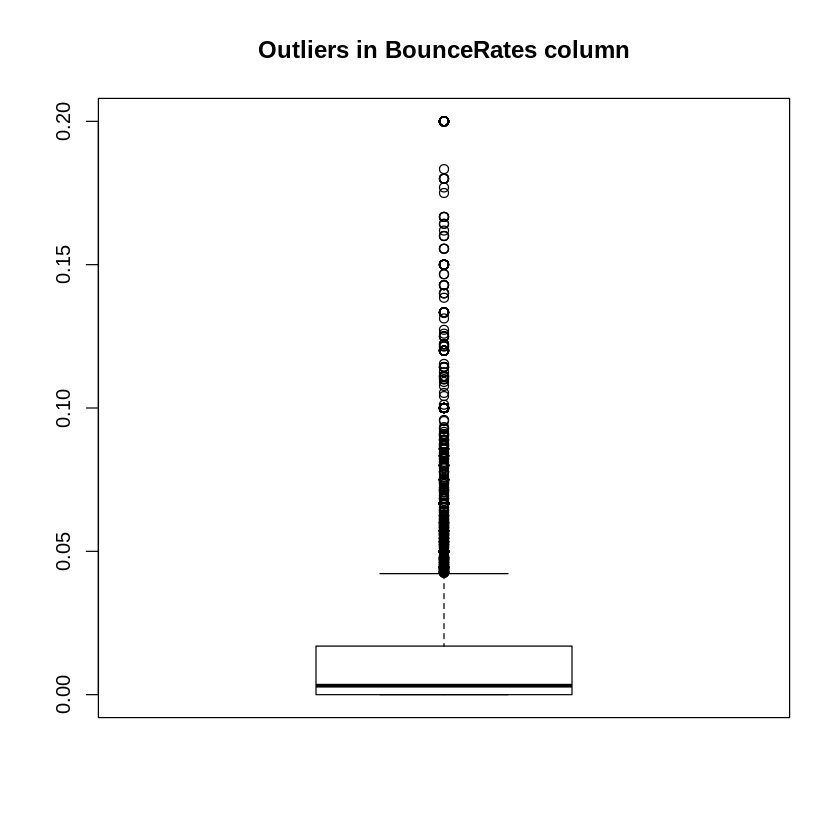

In [0]:
# checking outliers

boxplot(brand$BounceRates, main= 'Outliers in BounceRates column')

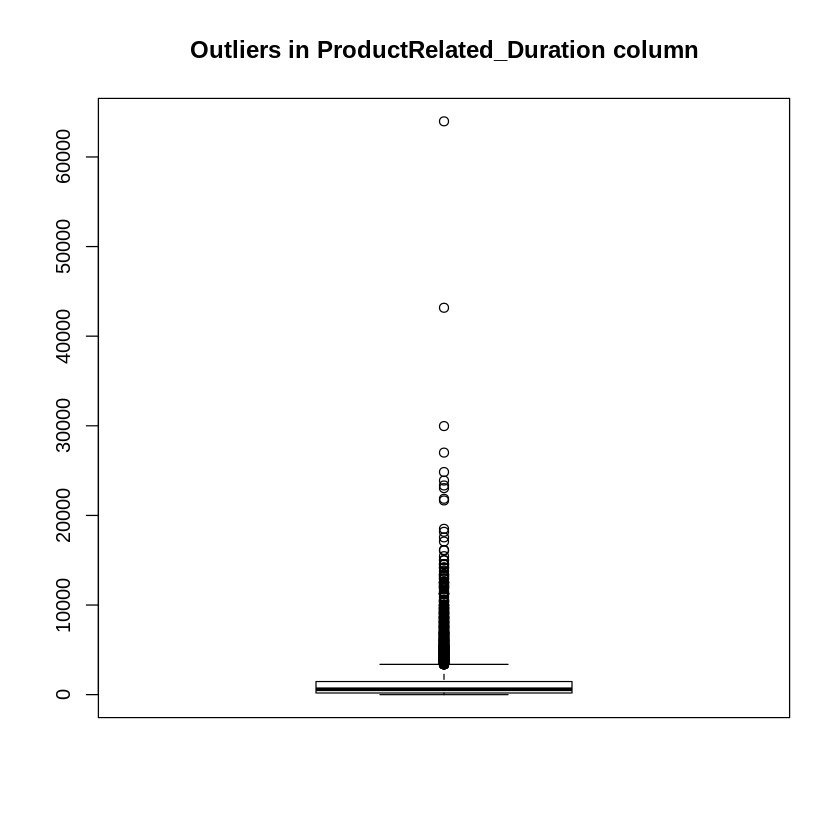

In [0]:
boxplot(brand$ProductRelated_Duration , main = 'Outliers in ProductRelated_Duration column')


#Most of the product related duartion is abetween 0 and 0.1

# Bivaraite and Multivariate Analysis

In [0]:
# Bivariate  and Multivariate analysis
# assigning the bouncerate column to the variable bounce
bounce <- brand$BounceRates

# assigning the exit rates as exits
exit <- brand$ProductRelated_Duration

 # using the cov()function to determine the covariance

cov(bounce,exit)
#there is  covariance between the two columns of -17.077


[1] -17.07668

In [0]:
# checking for correlation between the two columns

admin <- brand$Administrative_Duration


info <- brand$Informational_Duration

cor(admin,info)
# the two columns have a correlation of 0.2379. this shows they poorly correlated.

[1] 0.2379586

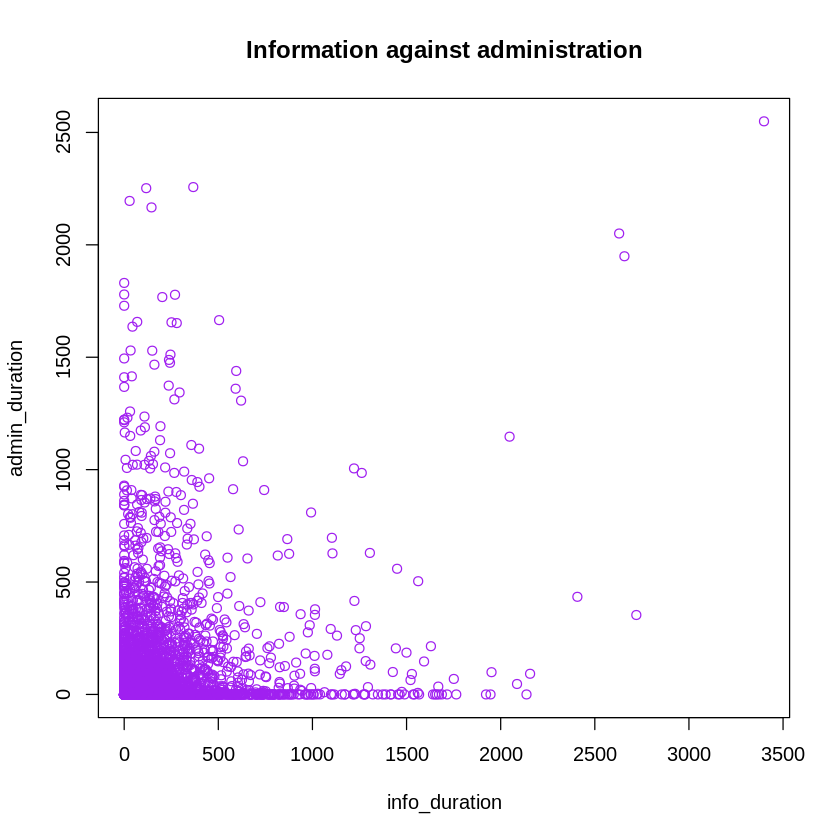

In [0]:
plot(admin, info, xlab="info_duration", ylab="admin_duration", col= "purple" , main = 'Information against administration')

#both admin and info time are positive related. as Admin duration increases information duration also increases.

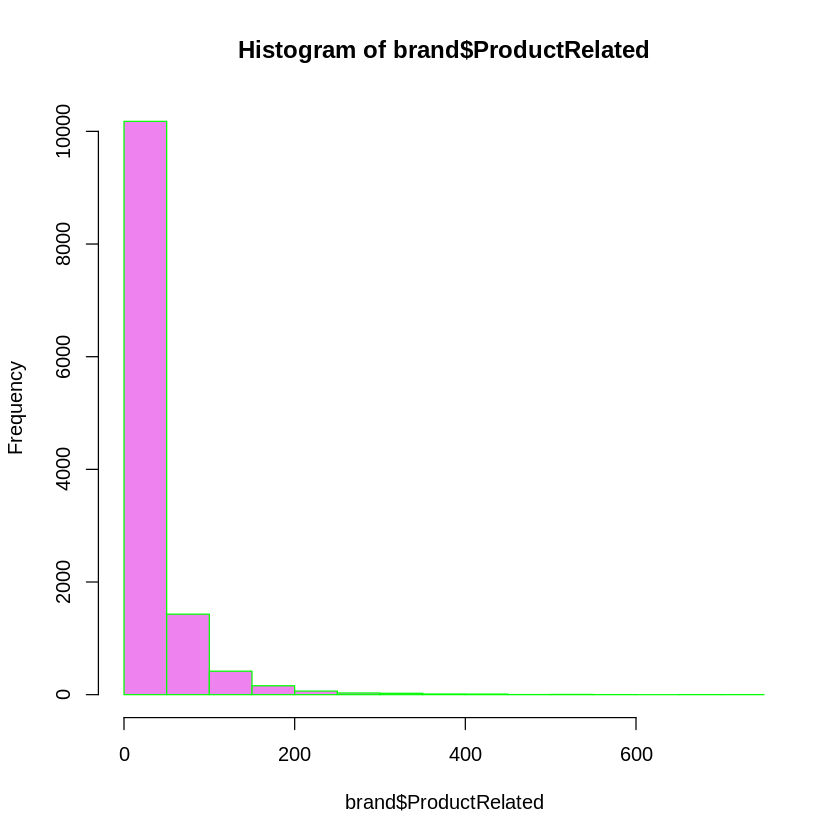

In [0]:
hist (brand$ProductRelated ,col="violet", border="Green")

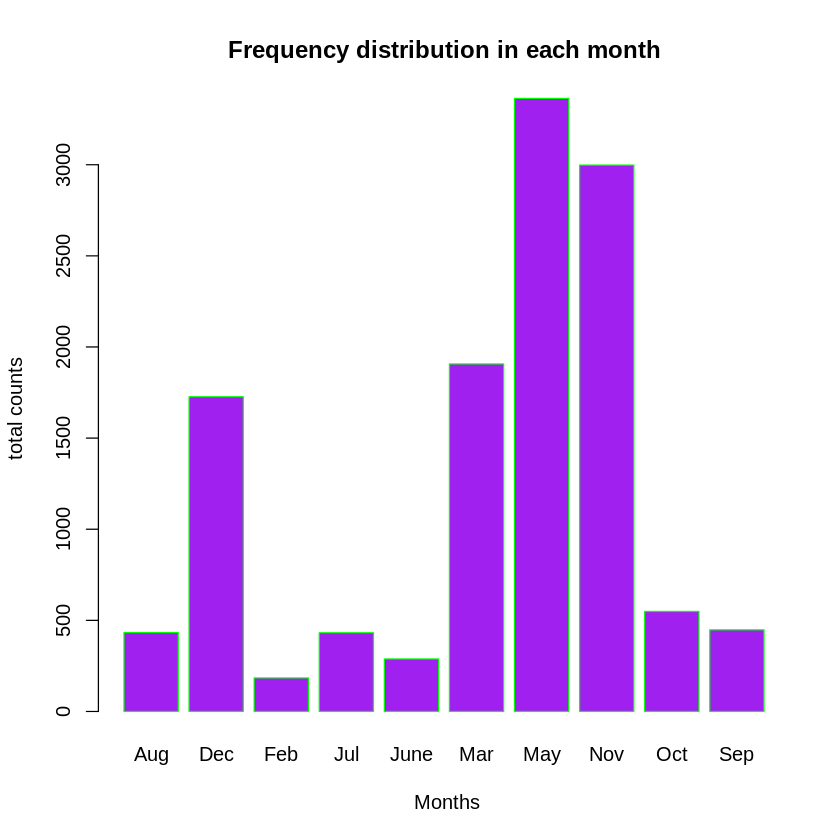

In [0]:
plot(brand$Month, ylab ='total counts', xlab = ' Months', main = 'Frequency distribution in each month', col = 'purple',border="Green")

# From the graph the of may,November and March: 3364,2998 and 1907  respectively had the highest number of products bought by customers


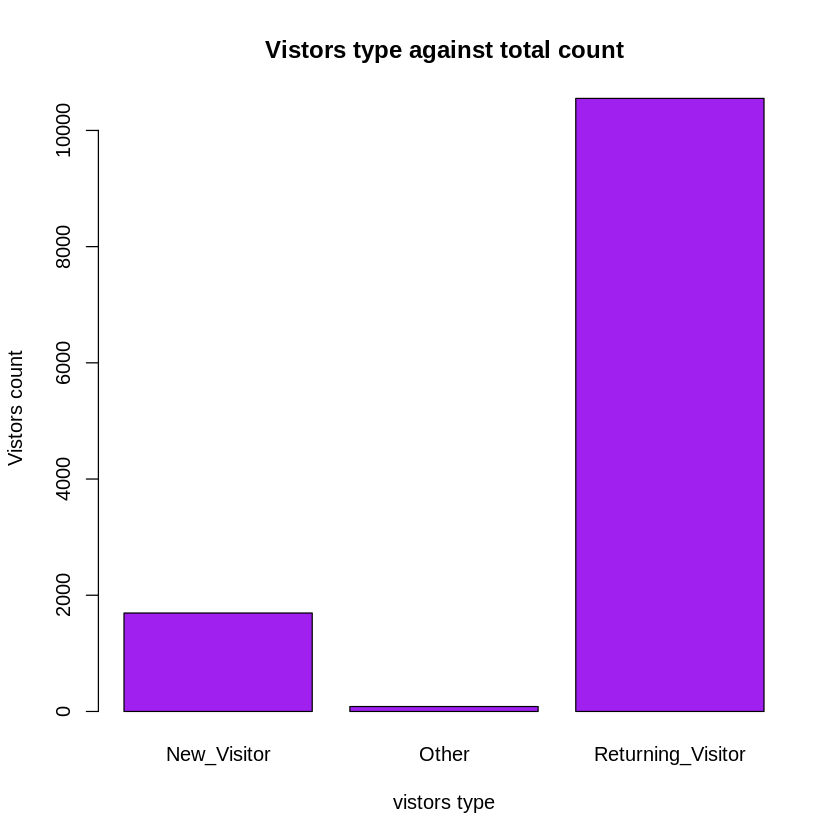

In [0]:
plot(brand$VisitorType ,xlab = "vistors type", ylab = 'Vistors count', main = 'Vistors type against total count', col='purple')

#In all vistors that  bought items from their outlets, most of them  were Returning _visitors with a  figure of 10551 followed by  new_vistors at 1694 and lastly others  which were 85 

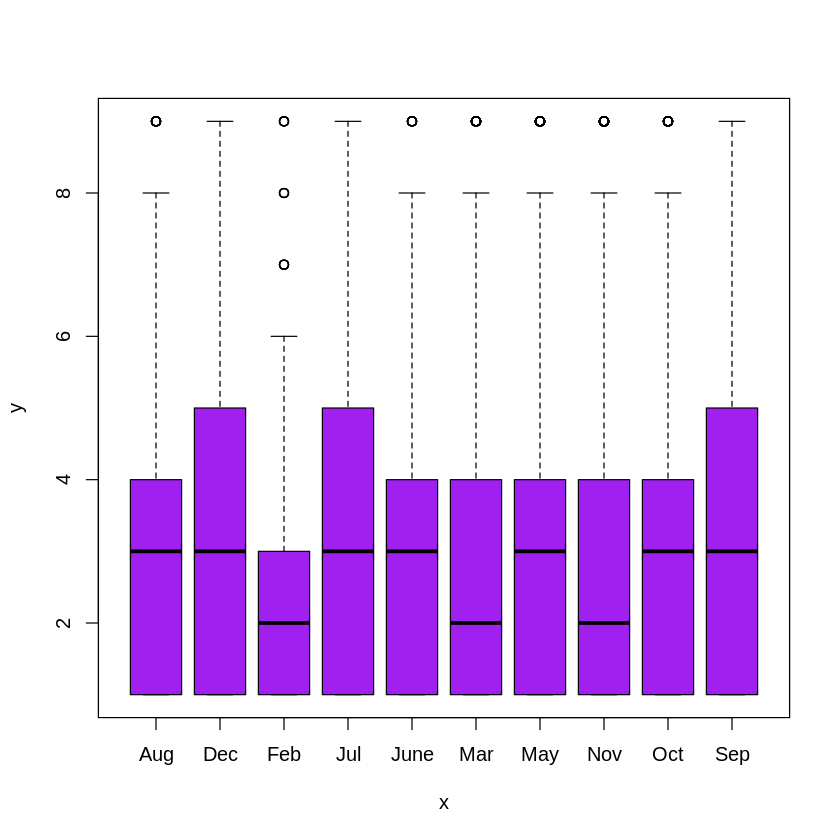

In [0]:
plot(brand$Month,brand$Region ,col = 'purple')

# Feb had the highest number of outlier than  any other month
# July,sep and DEc had no outliers

In [0]:
# checking unique values on weekend columns
unique(brand$Weekend)

[1] FALSE  TRUE

In [0]:
#library(dummies)

# converting weekend variables to numerical using dummies
# option max print is set as 99999 to enure no variable is omiitted when het are converted to dummies

brand$Weekend = factor(brand$Weekend,levels = c('FALSE', 'TRUE'),labels = c(0, 1),options(max.print = 999999 ))
head(brand$Weekend)

[1] 0 0 0 0 1 0
Levels: 0 1

In [0]:
# checking features in column vistor type
unique(brand$VisitorType)

[1] Returning_Visitor New_Visitor       Other            
Levels: New_Visitor Other Returning_Visitor

In [0]:
#converting visitor to numerical  using dummies

brand$VisitorType = factor(brand$VisitorType,levels = c('Returning_Visitor', 'New_Visitor','Other'),labels = c(1, 2,0),options(max.print = 999999 ))

head(brand$Revenue,20)


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [0]:
# checking values in visitortype column after converting to to numerical
unique(brand$VisitorType)

[1] 1 2 0
Levels: 1 2 0

In [0]:
# checking unique values in column month
unique(brand$Month)

[1] Feb  Mar  May  Oct  June Jul  Aug  Nov  Sep  Dec 
Levels: Aug Dec Feb Jul June Mar May Nov Oct Sep

In [0]:
install.packages('CatEncoders')

library(CatEncoders)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
#Encoding column month to be anumerical

 ecode = LabelEncoder.fit(brand$Month)

brand$Month = transform(ecode,brand$Month)

unique(brand_rev$Month)

[1]  3  6  7  9  5  4  1  8 10  2

In [0]:
unique(brand$Month)

[1]  3  6  7  9  5  4  1  8 10  2

In [0]:
# dropping label column ("Revenue")
#We shall use revenue to compare our results with it. The variables shows  the  page visted by a customer and the time they took on that page. Revenue shows whether after the customer visited the page they bought item or not 
brand_rev <- brand[,!(names(brand)%in% c("Revenue"))]

head(brand_rev)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType VisitorType
1 0          3     1                1       1      1           1          
2 0          3     2                2       1      2           1          
3 0          3     4                1       9      3           1          
4 0          3     3                2       2      4           1          
5 0          3     3                3       1      4           1          
6 0          3     2                2       1      3           1          
  Weekend
1 0      
2 0      
3 0      
4 0      
5 1      
6 0

In [0]:

brand_rev$VisitorType <- as.numeric(brand_rev$VisitorType)                       # Convert factor to numeric
brand_rev$Weekend <- as.numeric(brand_rev$Weekend)



In [0]:
# data types
str((brand_rev))

'data.frame':	12330 obs. of  17 variables:
 $ Administrative         : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : num  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : int  3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Weekend                : nu

# Dimensionality Reduction

In [0]:

#normalize <- function(x) {
#return ((x - min(x)) / (max(x) - min(x)))
#}

#min max scaler

#branoo <- as.data.frame(apply(brand_rev, 2,  function(x) (x - min(x))/max(x) - min(x)))
brand2 <- scale(brand_rev)


head(brand2)


Administrative Administrative_Duration Informational
[1,] -0.6979497     -0.4577177              -0.3968399   
[2,] -0.6979497     -0.4577177              -0.3968399   
[3,] -0.6979497     -0.4633751              -0.3968399   
[4,] -0.6979497     -0.4577177              -0.3968399   
[5,] -0.6979497     -0.4577177              -0.3968399   
[6,] -0.6979497     -0.4577177              -0.3968399   
     Informational_Duration ProductRelated ProductRelated_Duration BounceRates
[1,] -0.2451687             -0.6918663     -0.6251222               3.6745644 
[2,] -0.2451687             -0.6693767     -0.5916719              -0.4576990 
[3,] -0.2522737             -0.6918663     -0.6256448               3.6745644 
[4,] -0.2451687             -0.6693767     -0.6237284               0.5753668 
[5,] -0.2451687             -0.4894602     -0.2971523              -0.0444727 
[6,] -0.2451687             -0.2870542     -0.5445191              -0.1314677 
     ExitRates  PageValues SpecialDay Month     OperatingSystems Browser   
[1,]  3.2352400 -0.317165  -0.3088088 -1.334905 -1.2333763       -0.7902608
[2,]  1.1745443 -0.317165  -0.3088088 -1.334905 -0.1360728       -0.2079435
[3,]  3.2352400 -0.317165  -0.3088088 -1.334905  2.0585344       -0.7902608
[4,]  1.9988226 -0.317165  -0.3088088 -1.334905  0.9612308       -0.2079435
[5,]  0.1441964 -0.317165  -0.3088088 -1.334905  0.9612308        0.3743739
[6,] -0.3800157 -0.317165  -0.3088088 -1.334905 -0.1360728       -0.2079435
     Region     TrafficType VisitorType Weekend   
[1,] -0.8941422 -0.76259811 -0.4010088  -0.5505294
[2,] -0.8941422 -0.51416134 -0.4010088  -0.5505294
[3,]  2.4369825 -0.26572458 -0.4010088  -0.5505294
[4,] -0.4777516 -0.01728781 -0.4010088  -0.5505294
[5,] -0.8941422 -0.01728781 -0.4010088   1.8162862
[6,] -0.8941422 -0.26572458 -0.4010088  -0.5505294

In [0]:
# summary of the scaled dataframe
# the data has mean sclaed since the mean of each column is zero
summary(brand2)

 Administrative    Administrative_Duration Informational    
 Min.   :-0.6979   Min.   :-0.46337        Min.   :-0.3968  
 1st Qu.:-0.6979   1st Qu.:-0.45772        1st Qu.:-0.3968  
 Median :-0.3968   Median :-0.41246        Median :-0.3968  
 Mean   : 0.0000   Mean   : 0.00000        Mean   : 0.0000  
 3rd Qu.: 0.5066   3rd Qu.: 0.06987        3rd Qu.:-0.3968  
 Max.   : 7.4325   Max.   :18.77033        Max.   :18.5011  
                                                            
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :-0.2523        Min.   :-0.7144   Min.   :-0.6256        
 1st Qu.:-0.2452        1st Qu.:-0.5569   1st Qu.:-0.5283        
 Median :-0.2452        Median :-0.3095   Median :-0.3110        
 Mean   : 0.0000        Mean   : 0.0000   Mean   : 0.0000        
 3rd Qu.:-0.2452        3rd Qu.: 0.1402   3rd Qu.: 0.1401        
 Max.   :17.8682        Max.   :15.1408   Max.   :32.8114        
                                                  

In [0]:
# omitting missing values

brand_rev2= na.omit(brand_rev)

colSums(is.na(brand_rev))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend 
                      0                       0

PCA

In [0]:
# apply PCA - scale. = TRUE is highly 
# advisable, but default is FALSE. 

brand.pca <- prcomp(brand_rev2, center = TRUE, scale = TRUE)


In [0]:
# printing method
print(brand.pca)
# Principle compenents have been arranged  from 1 to 17. The order in which they have been arranged is based on the standard deviation

Standard deviations (1, .., p=17):
 [1] 1.8481448 1.3394168 1.2082126 1.0846865 1.0287342 1.0122690 0.9879791
 [8] 0.9764320 0.9651419 0.9340421 0.9167115 0.8803476 0.8666024 0.6489129
[15] 0.5928436 0.3504533 0.2753589

Rotation (n x k) = (17 x 17):
                                PC1          PC2          PC3         PC4
Administrative           0.38051699 -0.022300972  0.073633881 -0.14383274
Administrative_Duration  0.32697190 -0.064101261  0.105512655 -0.19649634
Informational            0.34669924 -0.236199122  0.094437160 -0.22657455
Informational_Duration   0.29464166 -0.251154379  0.109055043 -0.24621161
ProductRelated           0.41092585 -0.168196038  0.024636705  0.28970446
ProductRelated_Duration  0.41240810 -0.198093500  0.048991372  0.24782616
BounceRates             -0.27773458 -0.538602871  0.198074116 -0.15868756
ExitRates               -0.32359371 -0.524563272  0.169371412 -0.13405724
PageValues               0.09183284  0.216041481  0.093867847 -0.11043240
SpecialDa

In [0]:
# Printing the summary of my PCA

summary(brand.pca)
#(Principl Compenents) PC are arranged  in the order total  proportion variance. 
#PC1 explain  20 % of the variance, meaning 20% of the   data set (PC!...17) can be encapsulated by just few PC. 

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8481 1.3394 1.20821 1.08469 1.02873 1.01227 0.98798
Proportion of Variance 0.2009 0.1055 0.08587 0.06921 0.06225 0.06028 0.05742
Cumulative Proportion  0.2009 0.3065 0.39232 0.46153 0.52378 0.58406 0.64148
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.97643 0.96514 0.93404 0.91671 0.88035 0.86660 0.64891
Proportion of Variance 0.05608 0.05479 0.05132 0.04943 0.04559 0.04418 0.02477
Cumulative Proportion  0.69756 0.75235 0.80367 0.85311 0.89869 0.94287 0.96764
                          PC15    PC16    PC17
Standard deviation     0.59284 0.35045 0.27536
Proportion of Variance 0.02067 0.00722 0.00446
Cumulative Proportion  0.98832 0.99554 1.00000

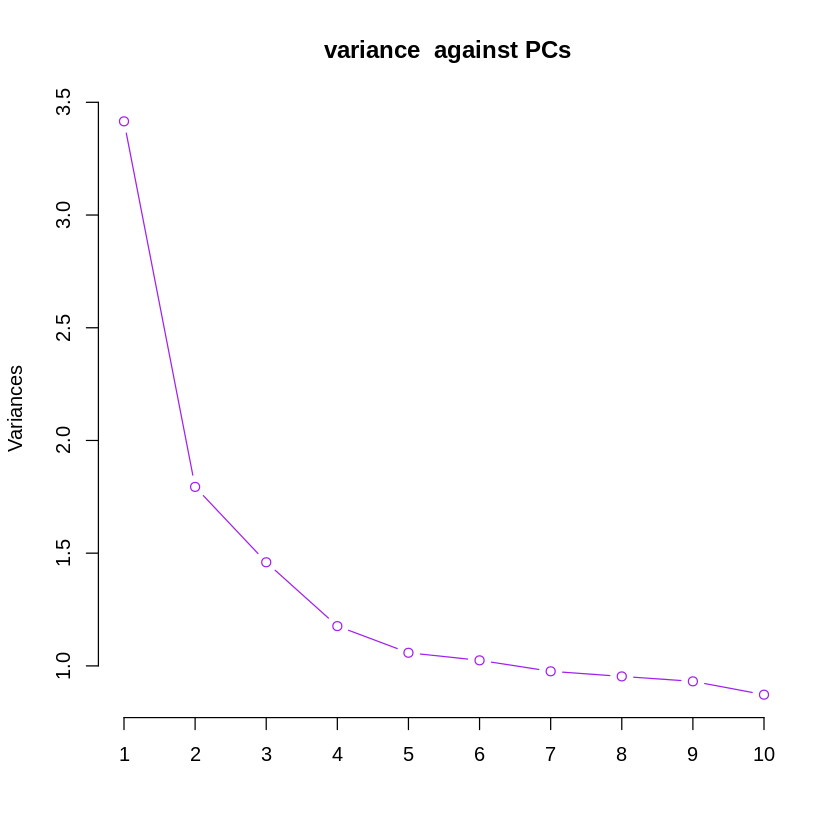

In [0]:
#The plot method returns a plot of the variances (y-axis) associated with the PCs (x-axis). and the max variance is 3.5
#  the plot is useful to decide how many PCs to retain for further analysis. 
# As PCs increases variance decreases

plot(brand.pca, type = "l" ,col = "purple",main = " variance  against PCs")

In [0]:
newdata <- tail(brand_rev2,2)
# Predict PCs
predict(brand.pca, 
        newdata)

pre <- c(brand.pca,newdata)

head(pre)

PC1        PC2       PC3       PC4        PC5       PC6        PC7       
12329 -0.1595951 0.4976259 0.1623541  0.7334337 0.5771817 -0.6714630 -0.2760363
12330 -1.0832267 1.2327899 0.1392146 -0.3958552 1.7092712  0.7971065  0.5141288
      PC8        PC9        PC10       PC11       PC12       PC13      
12329 -0.4713673 -0.6713874 1.30611887 -0.8087473  0.5379534 -0.5496168
12330  1.1337027 -0.5969326 0.03012092  1.2224930 -1.4828898  0.8777471
      PC14       PC15        PC16       PC17       
12329  0.2616063 -0.35222432 0.04481453 -0.03302288
12330 -0.2130607  0.09130806 0.10265903  0.69360614

$sdev
 [1] 1.8481448 1.3394168 1.2082126 1.0846865 1.0287342 1.0122690 0.9879791
 [8] 0.9764320 0.9651419 0.9340421 0.9167115 0.8803476 0.8666024 0.6489129
[15] 0.5928436 0.3504533 0.2753589

$rotation
                                PC1          PC2          PC3         PC4
Administrative           0.38051699 -0.022300972  0.073633881 -0.14383274
Administrative_Duration  0.32697190 -0.064101261  0.105512655 -0.19649634
Informational            0.34669924 -0.236199122  0.094437160 -0.22657455
Informational_Duration   0.29464166 -0.251154379  0.109055043 -0.24621161
ProductRelated           0.41092585 -0.168196038  0.024636705  0.28970446
ProductRelated_Duration  0.41240810 -0.198093500  0.048991372  0.24782616
BounceRates             -0.27773458 -0.538602871  0.198074116 -0.15868756
ExitRates               -0.32359371 -0.524563272  0.169371412 -0.13405724
PageValues               0.09183284  0.216041481  0.093867847 -0.11043240
SpecialDay              -0.06988529 -0.133666905 -0.001801072  0.49989013
Month                    0.04476157 -0.045762530 -0.087653678  0.44606503
OperatingSystems        -0.01557117  0.086609520  0.545260005  0.16642786
Browser                 -0.02030967  0.145114790  0.491507041  0.11045227
Region                  -0.02195884  0.113461884  0.265854506 -0.06429216
TrafficType             -0.05179445  0.003787234  0.440087762  0.24145175
VisitorType             -0.01462994  0.363585237  0.263081994 -0.27320582
Weekend                  0.03372795  0.058803715 -0.052472656 -0.04705659
                                PC5          PC6         PC7         PC8
Administrative           0.12822187 -0.374516875  0.10073810 -0.14158853
Administrative_Duration  0.15794613 -0.448018753  0.11230495 -0.19081066
Informational            0.12310269  0.357852732 -0.18466684 -0.14500137
Informational_Duration   0.11735214  0.469488667 -0.24454462 -0.16071039
ProductRelated          -0.22949664 -0.059062265  0.12923104  0.25293844
ProductRelated_Duration -0.22332294 -0.041331307  0.11033140  0.23764448
BounceRates              0.07534842 -0.192505647  0.03845445  0.10875348
ExitRates                0.04463546 -0.135354346  0.03057960  0.07299716
PageValues               0.22756179 -0.196425302 -0.41984322  0.27483447
SpecialDay               0.13831001  0.185777361 -0.14727027 -0.40867982
Month                    0.52242752 -0.200412130 -0.09309416 -0.15840364
OperatingSystems        -0.04122533  0.107838815  0.03758873  0.17399407
Browser                 -0.23019948  0.079385712 -0.06522795  0.07072983
Region                  -0.14905667  0.007854943  0.49439223 -0.56841912
TrafficType              0.27929409 -0.042045736 -0.06369903  0.03453288
VisitorType              0.18504894 -0.030157971 -0.09485874 -0.01941930
Weekend                  0.53523151  0.340632901  0.61828600  0.36261637
                                PC9         PC10        PC11        PC12
Administrative          -0.20002794 -0.132373214  0.03914439  0.12553810
Administrative_Duration -0.27104901 -0.184604381  0.05419861  0.14736367
Informational            0.02841290  0.088066350  0.02475299  0.04953557
Informational_Duration   0.05475259  0.114846307  0.03781200  0.01567840
ProductRelated           0.14860549 -0.017739840 -0.06388662 -0.25065090
ProductRelated_Duration  0.15039770 -0.005972088 -0.05808854 -0.26255410
BounceRates              0.12044118 -0.080426950  0.05336132 -0.12548657
ExitRates                0.08639889 -0.063595113  0.05688174 -0.08091482
PageValues               0.61493978 -0.322635005 -0.20886585  0.22156727
SpecialDay              -0.10380905 -0.668136338 -0.09697369 -0.12563594
Month                    0.23497054  0.418128942  0.45365021 -0.04742247
OperatingSystems        -0.18533887  0.040218273  0.09292772  0.19120058
Browser                  0.02705980 -0.154025020  0.53943660  0.19755396
Region                   0.53880841  0.078817421 -0.15076554  0.01627980
TrafficType             -0.20569314  0.316677405 -0.62014

# Modeling

# 1. K Means Clustering

In [0]:

# forming two clusters in brand_rv2 using k means
# brand_rev2 is our  new normalized data that we shall use for  clustering
brand_km <- kmeans(brand_rev2,2)

In [0]:
# Previewing the no. of records in each cluster
# 
brand_km$size
# 933 of the points have been classified as cluster one  and 11383 have been clasificied as class 1


[1]   933 11383

In [0]:
#Getting the value of cluster center datapoint value(2 centers for k=2)

brand_km$centers 

Administrative Administrative_Duration Informational Informational_Duration
1 5.624866       207.73068               1.755627      146.3098              
2 2.046736        70.51109               0.401388       25.3425              
  ProductRelated ProductRelated_Duration BounceRates ExitRates  PageValues
1 135.47481      6093.2140               0.006524418 0.02077043 7.345740  
2  23.26329       794.6432               0.023433404 0.04482478 5.777121  
  SpecialDay Month    OperatingSystems Browser  Region   TrafficType
1 0.04587353 6.659164 2.145766         2.366559 2.900322 3.592712   
2 0.06277783 6.123518 2.122375         2.356848 3.168321 4.109637   
  VisitorType Weekend 
1 1.024652    1.233655
2 1.161732    1.232540

In [0]:
# Getting the cluster vector that shows the cluster where each record falls
# ---
# 
brand_km$cluster

In [0]:
install.packages("fviz_cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message:
“package ‘fviz_cluster’ is not available (for R version 3.6.1)”

In [0]:
# Visualizing the  clustering results

fviz_cluster(brand_km,brand_rev2)
# 

ERROR: ignored

# Hierarchical Clustering

In [0]:
# First we use the dist() function to compute the Euclidean distance between observations, 
# d will be the first argument in the hclust() function dissimilarity matrix
# ---
#
brand_h <- dist(brand_rev2, method = "euclidean")



In [0]:
# We then hierarchical clustering using the Ward's method
# ---
# 
brand.hc <- hclust(brand_h, method = "ward.D2" )


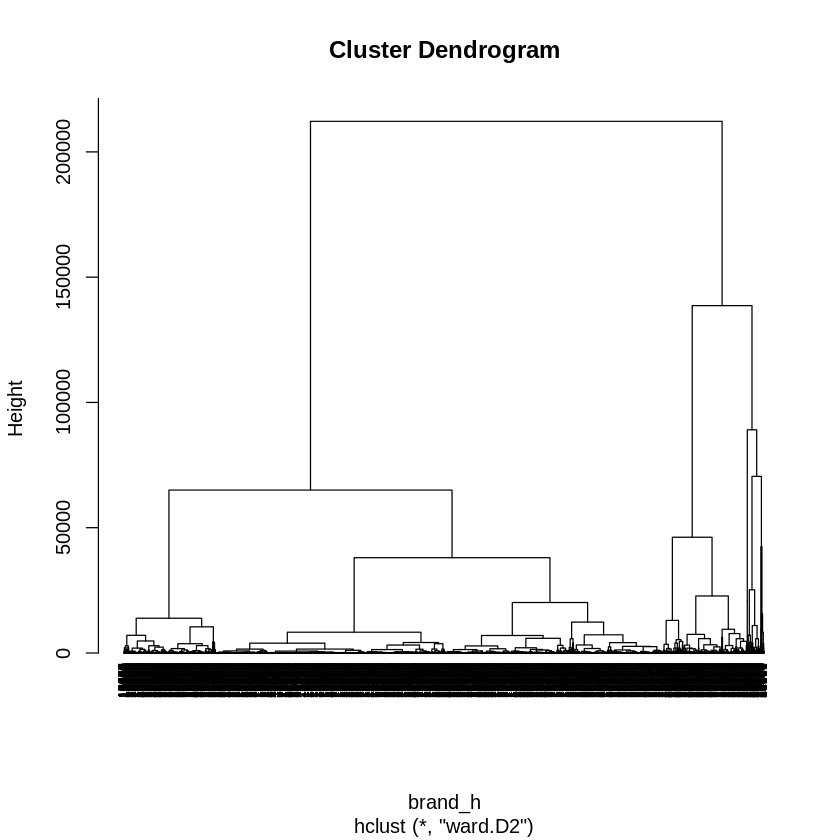

In [0]:
# Lastly, we plot the obtained dendrogram
# ---
# 
plot(brand.hc, cex = 0.6, hang = -1)